<a href="https://colab.research.google.com/github/CezarMontenegro/concrete_strength_prediction/blob/main/concrete_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

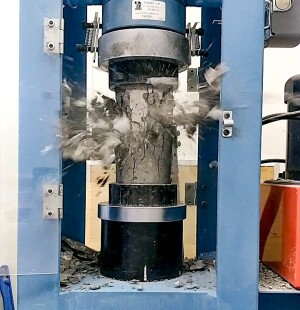


### **Resistência à compressão do concreto**

A resistência à compressão do concreto é conhecida como Fck — uma sigla que em inglês significa Feature Compression Know (em português significa resistência característica do concreto à compressão). Ela é medida em megapascal (MPa), e cada 1 mpa corresponde a uma resistência aproximada de 10 kgf/cm².

O Fck indica, portanto, a qual tensão o concreto tem capacidade de resistir. Essa tensão é a resultante da divisão entre a força e a área em que ela atuará. Dessa forma, os testes de resistência no concreto possibilitam confirmar a tensão máxima a que ele resistirá antes de sofrer ruptura.

O concreto e formado por 5 principais componentes: agregado miúdo, agregado graúdo, cimento, água e aditivos, a resitência final a compressão sera definida pelo tipo e as quantidade desses componentes adicionados a mistura, sabemos também que o concreto se torna mais resistente a compressão conforme o tempo passa.

&nbsp;


**Neste projeto vamos fazer uma análise dos dados coletados e criar um modelo que irá prever a resistencia a compressão de amostras de concreto de acordo com sua composição e idade.**







# **1.0 Importando Bibliotecas e Dataset**

In [4]:
# Importando bibliotecas de análise/visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
# Importando base de dados
concrete_db = pd.read_csv('Concrete.csv')

## **Limpeza/Tratamento dos dados**

In [6]:
concrete_db


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
concrete_db.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [8]:
concrete_db.nunique()

cement              278
slag                185
flyash              156
water               195
superplasticizer    111
coarseaggregate     284
fineaggregate       302
age                  14
csMPa               845
dtype: int64

## **Análise exploratória dos dados**

In [9]:
# Estatisticas do dataset
concrete_db.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


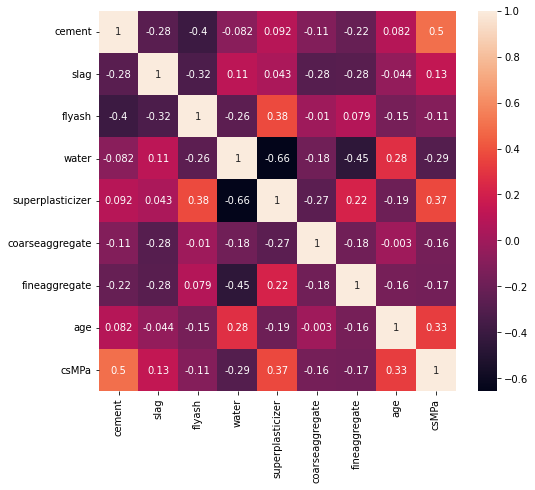

In [10]:
# Análise de correlaçào entre os atributos
plt.figure(figsize=(8,7))
sns.heatmap(concrete_db.corr(), annot=True);

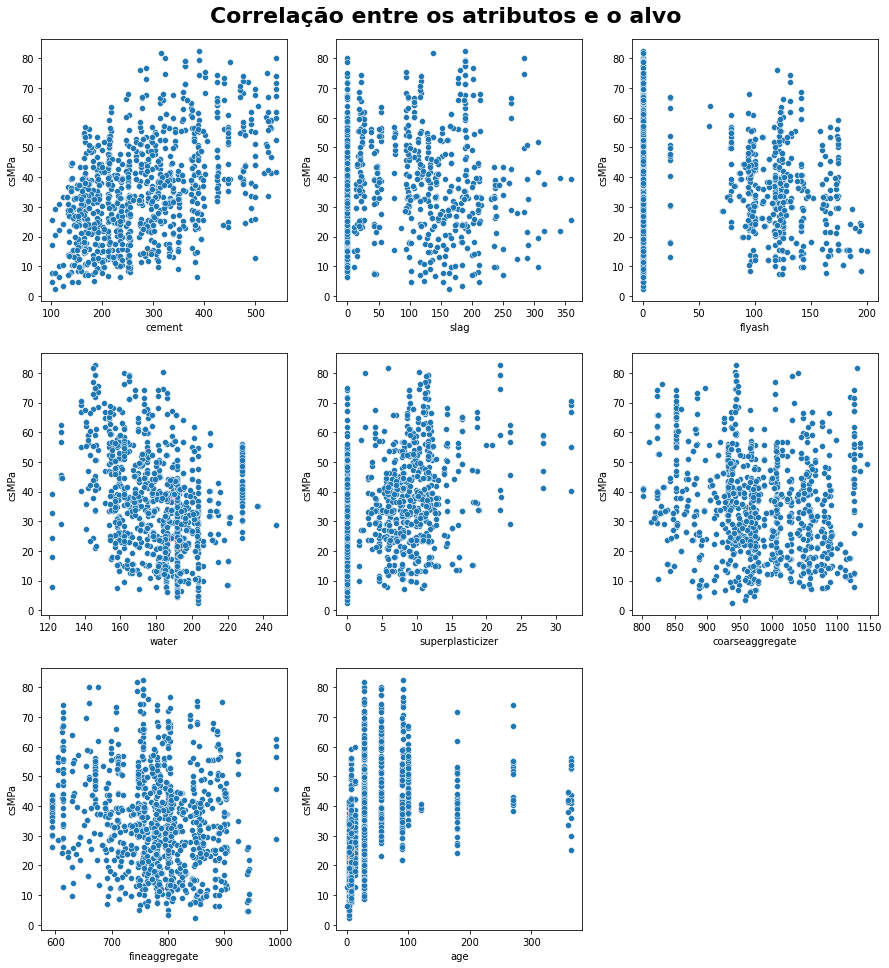

In [11]:
figure, axis = plt.subplots(figsize=(15,15))

plt.suptitle('Correlação entre os atributos e o alvo', fontsize=22, fontweight=600)

position = 1
for column in concrete_db.columns:
  plt.subplot(3, 3, position)
  sns.scatterplot(data=concrete_db, x=column, y='csMPa', palette='bone')

  position += 1

  if position >= 9:
    break

plt.subplots_adjust(top=0.95, hspace=0.2)

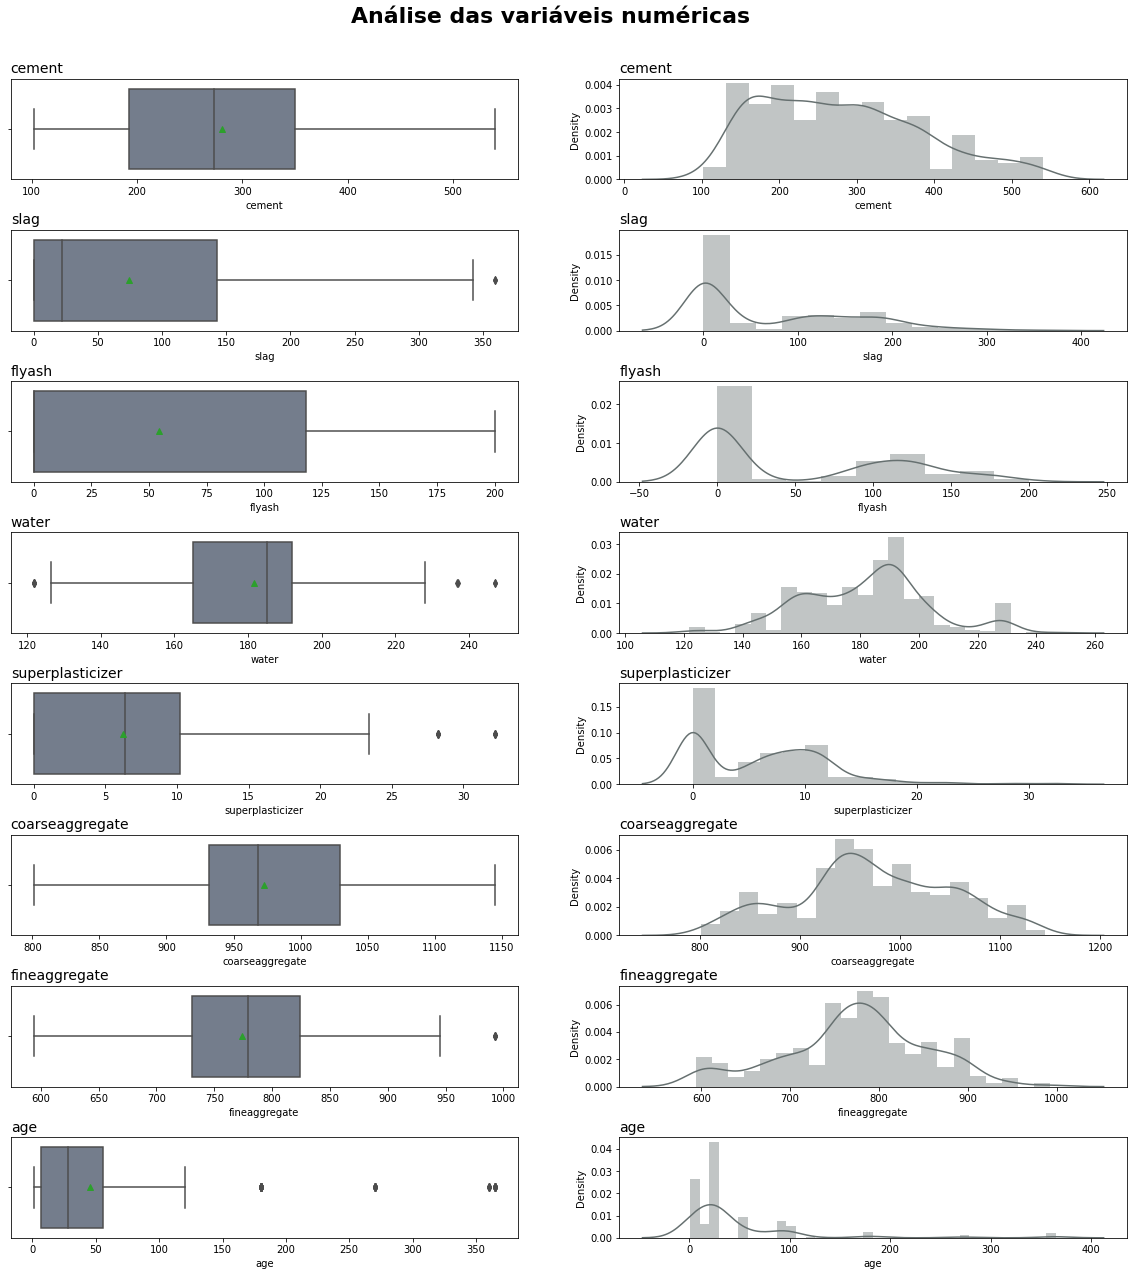

In [12]:
figure = plt.subplots(figsize=(20,20));
plt.suptitle('Análise das variáveis numéricas', fontsize=22, fontweight=600);

position = 1

for column in concrete_db.columns:
  plt.subplot(8, 2, position)
  plt.title(column, loc='left', fontsize=14, fontweight=200)
  sns.boxplot(data=concrete_db, x=column, showmeans=True, palette='bone');
  position += 1

  plt.subplot(8, 2, position)
  plt.title(column, loc='left', fontsize=14, fontweight=200);
  sns.distplot(concrete_db[column], color='#667070')
  position += 1

  if position >= 17:
    break

plt.subplots_adjust(top=.93, hspace=.5)

## **Pré-processamento dos dados**

In [13]:
# Criação dos vetores previsores e alvo
X_concrete = concrete_db.iloc[:, :-1].values
y_concrete = concrete_db.iloc[:, -1].values

In [14]:
# Transformando coluna alvo em matriz
y_concrete = y_concrete.reshape(-1,1)

In [15]:
# Importando biblioteca de separaçao de dados treino / teste
from sklearn.model_selection import train_test_split

In [16]:
X_concrete_train, X_concrete_test, y_concrete_train, y_concrete_test = train_test_split(X_concrete, y_concrete, test_size=0.2, random_state=0)

## **Seleção do modelo**

In [17]:
# Importando biblioteca de tunagem dos hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV

# Importando bibliotecas de avaliação de erro do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Regressão Linear Multipla**

In [18]:
parameter = {}

In [19]:
# Importando modelo regressão linear
from sklearn.linear_model import LinearRegression

# Instanciando modelo
multiple_regressor_cv = RandomizedSearchCV(LinearRegression(), param_distributions=parameter)

# Treinando modelo
multiple_regressor_cv.fit(X_concrete, y_concrete)

RandomizedSearchCV(estimator=LinearRegression(), param_distributions={})

In [20]:
# Mostrando o Coeficiente de determinação R2
multiple_regressor_cv.score(X_concrete, y_concrete)

0.6155198704142721

In [21]:
# Realizando Predições
predictions = multiple_regressor_cv.predict(X_concrete_test)

In [22]:
# Erro absoluto médio (MAE)
mean_absolute_error(y_concrete_test, predictions)

7.769209160285448

### **Regressão polinomial**

In [23]:
# Importando transformador Polynomial
from sklearn.preprocessing import PolynomialFeatures

# Instanciando transformador Polynomial
poly = PolynomialFeatures(degree = 10)

# Transformando dados simples em polynomiais
X_concrete_poly = poly.fit_transform(X_concrete)

In [24]:
# Instanciando modelo
regressor_concrete_poly = RandomizedSearchCV(LinearRegression(), param_distributions=parameter)

# Treinando modelo com dados polynomias
regressor_concrete_poly.fit(X_concrete_poly, y_concrete)

RandomizedSearchCV(estimator=LinearRegression(), param_distributions={})

In [25]:
# Coeficiente de determinacao do modelo
regressor_concrete_poly.score(X_concrete_poly, y_concrete)

0.9960535251982137

In [26]:
# Realizando predições
predictions_poly = regressor_concrete_poly.predict(X_concrete_poly)

In [27]:
# MAE
mean_absolute_error(y_concrete, predictions_poly)

0.10873021148393716

### **Regressão com Árvores de Decisão**

In [28]:
# Definindo parametro para Cross Validation
tree_parameters = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'splitter': ['best', 'random'],
  'max_depth': [1, 5, 10, 20, 50, 100],
  'min_samples_split': [2, 4, 8, 16, 32, 64, 100],
  'min_samples_leaf': [2, 4, 8, 16, 32, 64, 100]
}

In [29]:
# Importando modelo regressão linear
from sklearn.tree import DecisionTreeRegressor

# Instanciando modelo
tree_regressor_cv = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=tree_parameters)

# Treinando modelo
tree_regressor_cv.fit(X_concrete, y_concrete)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 5, 10, 20, 50, 100],
                                        'min_samples_leaf': [2, 4, 8, 16, 32,
                                                             64, 100],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64, 100],
                                        'splitter': ['best', 'random']})

In [30]:
# Mostrando melhores hiperparâmetros
best_params =tree_regressor_cv.best_params_
print(best_params)

{'splitter': 'random', 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'squared_error'}


In [31]:
# Instanciando modelo
tree_regressor = DecisionTreeRegressor(splitter='best', min_samples_split=16, min_samples_leaf=8, max_depth=100, criterion='friedman_mse')

tree_regressor.fit(X_concrete, y_concrete)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=100,
                      min_samples_leaf=8, min_samples_split=16)

In [32]:
# Mostrando o Coeficiente de determinação R2
tree_regressor.score(X_concrete, y_concrete)

0.9099816547359407

In [33]:
# Realizando Predições
tree_predictions = multiple_regressor_cv.predict(X_concrete)

In [34]:
# Erro absoluto médio (MAE)
mean_absolute_error(y_concrete, tree_predictions)

8.214343706221815

### **Regressão com Random Forest**

In [35]:
# Definindo parametro para Cross Validation
forest_parameters = {
  'criterion': ['squared_error', 'absolute_error', 'poisson'],
  'max_depth': [1, 5, 10, 20, 50, 100],
  'min_samples_split': [2, 4, 8, 16, 32, 64, 100],
  'min_samples_leaf': [2, 4, 8, 16, 32, 64, 100]
}

In [36]:
# Importando modelo regressão linear
from sklearn.ensemble import RandomForestRegressor

# Instanciando modelo
forest_regressor_cv = RandomizedSearchCV(RandomForestRegressor(), param_distributions=forest_parameters)

# Treinando modelo
forest_regressor_cv.fit(X_concrete, y_concrete)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 5, 10, 20, 50, 100],
                                        'min_samples_leaf': [2, 4, 8, 16, 32,
                                                             64, 100],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64, 100]})

In [37]:
best_params =forest_regressor_cv.best_params_
print(best_params)

{'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 20, 'criterion': 'absolute_error'}


In [38]:
# Instanciando modelo
forest_regressor = RandomForestRegressor(min_samples_split=8, min_samples_leaf=16, max_depth=20, criterion='squared_error')

forest_regressor.fit(X_concrete, y_concrete)

RandomForestRegressor(max_depth=20, min_samples_leaf=16, min_samples_split=8)

In [39]:
# Mostrando o Coeficiente de determinação R2
forest_regressor.score(X_concrete, y_concrete)

0.8750262243251331

In [40]:
# Realizando Predições
forest_predictions = forest_regressor.predict(X_concrete)

In [41]:
# Erro absoluto médio (MAE)
mean_absolute_error(y_concrete, forest_predictions)

4.493411265281761

### **Regressão com SVM**

In [42]:
# Importando biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

# Instanciando StandardScaler()
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Padronizando dados
X_concrete_scaled = X_scaler.fit_transform(X_concrete)
y_concrete_scaled = y_scaler.fit_transform(y_concrete)

In [43]:
SVR_parameters = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'degree': [1,2,3,4,5,6,7,8,9,10],
  'gamma': ['scale', 'auto'],
  'C': [1,2,3,4,5,6,7,8,9,10]
}

In [44]:
# Importando modelo regressão linear
from sklearn.svm import SVR

# Instanciando modelo
SVR_regressor = RandomizedSearchCV(SVR(), param_distributions=SVR_parameters)

# Treinando modelo
SVR_regressor.fit(X_concrete_scaled, y_concrete_scaled)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [45]:
best_params =SVR_regressor.best_params_
print(best_params)

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 9, 'C': 2}


In [46]:
# Instanciando modelo
SVR_regressor = SVR(kernel='rbf', gamma='auto', degree=4, C=2)

SVR_regressor.fit(X_concrete_scaled, y_concrete_scaled)

SVR(C=2, degree=4, gamma='auto')

In [47]:
# Mostrando o Coeficiente de determinação R2
SVR_regressor.score(X_concrete_scaled, y_concrete_scaled)

0.9084790817757731

In [48]:
# Realizando Predições
SVR_predictions = forest_regressor.predict(X_concrete_scaled)

In [49]:
# Erro absoluto médio (MAE)
mean_absolute_error(y_concrete_scaled, SVR_predictions)

12.994083542956748

## **Criação do modelo Regressão Polynomial**

In [50]:
# Importando transformador Polynomial
from sklearn.preprocessing import PolynomialFeatures

# Instanciando transformador Polynomial
poly = PolynomialFeatures(degree = 3)

# Transformando dados simples em polynomiais
X_concrete_train_poly = poly.fit_transform(X_concrete_train)
X_concrete_test_poly = poly.transform(X_concrete_test)

In [51]:
regressor_concrete_poly = LinearRegression()

regressor_concrete_poly.fit(X_concrete_train_poly, y_concrete_train)

LinearRegression()

In [52]:
regressor_concrete_poly.score(X_concrete_train_poly, y_concrete_train)

0.9321177548445568

In [53]:
regressor_predictions = regressor_concrete_poly.predict(X_concrete_test_poly)

In [54]:
mean_absolute_error(y_concrete_test, regressor_predictions)

4.816697127604467